In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%cd ..

/scratch/km817/iREC


In [4]:
import torch
import torch.distributions as dist
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from rec.utils import kl_estimate_with_mc, plot_running_sum_1d, plot_1d_distribution, kl_estimate_with_mc
from tqdm.notebook import trange
#import seaborn as sns; sns.set(); sns.set_style('whitegrid')
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

# Problem 1

The KL between q and p is 50.000 nats.


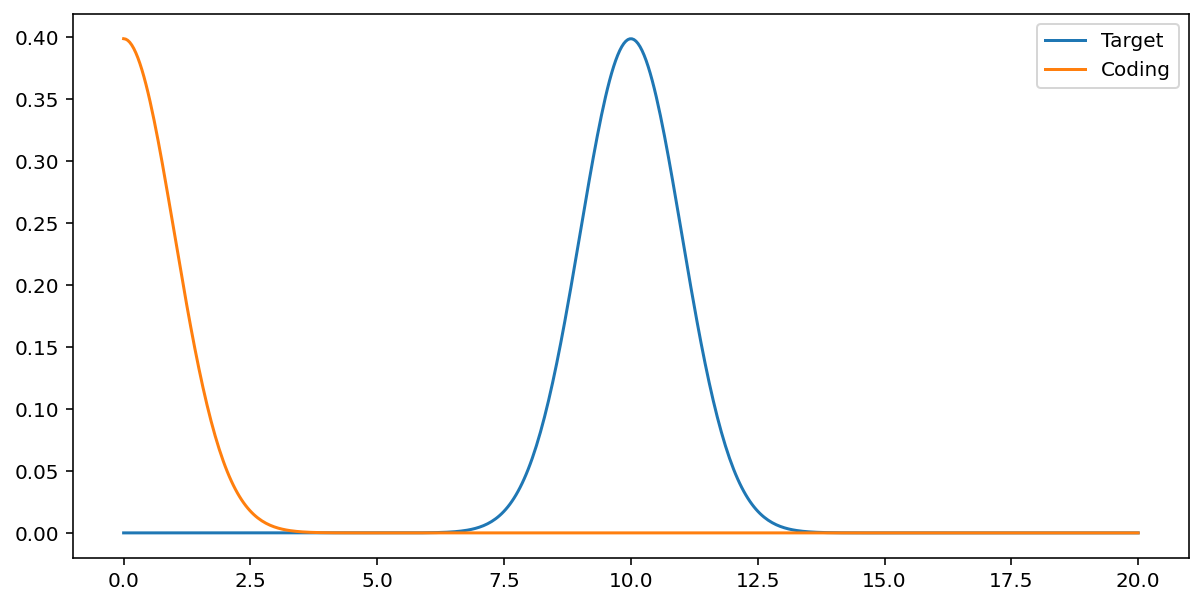

In [47]:
torch.manual_seed(100)

q_loc = 10.
q_var = 1.

p_loc = 0.
p_var = 1.

q = dist.MultivariateNormal(loc=torch.tensor([q_loc]), covariance_matrix = q_var * torch.eye(1))
p = dist.MultivariateNormal(loc=torch.tensor([p_loc]), covariance_matrix = p_var * torch.eye(1))

z_sample = q.sample()

try:
    total_kl = dist.kl_divergence(q, p)
except:
    total_kl = kl_estimate_with_mc(q, p, num_samples=10000).mean()
print(f"The KL between q and p is {total_kl:.3f} nats.")

# ==============================
# PLOT DISTRIBUTIONS
# ==============================

xs = torch.linspace(q_loc - 10, q_loc + 10, 500).reshape(-1, 1)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(xs, torch.exp(q.log_prob(xs)), label='Target')
ax.plot(xs, torch.exp(p.log_prob(xs)), label='Coding')


ax.legend()

plt.show()

In [48]:
from rec.beamsearch.Coders.Encoder import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.EmpiricalMixturePosterior import EmpiricalMixturePosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler

In [49]:
samples = q.sample((500,))
z_sample = samples.mean().reshape(-1, 1)

In [51]:
from rec.OptimisingVars.FinalJointOptimiser import FinalJointOptimiser
coding_sampler = CodingSampler
auxiliary_posterior = EmpiricalMixturePosterior
selection_sampler = GreedySampler
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1./p_var
dummy_encoder = Encoder(q,
                         initial_seed,
                         coding_sampler,
                         selection_sampler,
                         auxiliary_posterior,
                         omega,
                        n_samples_from_target=10,
                         beamwidth=beamwidth,
                         epsilon=epsilon,
                         prior_var=1./alpha)

omega = 5
n_trajectories = 12
n_auxiliaries = dummy_encoder.n_auxiliary
prior_var = 1./alpha
emp_opt = FinalJointOptimiser(z_sample, omega, n_auxiliaries, total_kl, n_trajectories, prior_var)
aux_vars = emp_opt.run_optimiser(epochs=1000)

The mean loss is 4.56507. The mean KL is: 5.33555: 100%|██████████| 1000/1000 [00:15<00:00, 64.99it/s]


In [52]:
num_compressed_samples = 500
greedy_samples = []
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1./p_var
for i in trange(num_compressed_samples):
    initial_seed = initial_seed + i * 10
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=50,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1./alpha)
    
    enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    z, idx = enc.run_encoder()
    greedy_samples.append(z)

  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
num_compressed_samples = 500
bw_5_samples = []
omega = 5
initial_seed = 0
beamwidth = 5
epsilon = 0.2
alpha = 1./p_var
for i in trange(num_compressed_samples):
    initial_seed = initial_seed + i * 10
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=500,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1./alpha)

        
    enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    z, idx = enc.run_encoder()
    bw_5_samples.append(z[0])

In [ ]:
num_compressed_samples = 500
bw_10_samples = []
omega = 5
initial_seed = 0
beamwidth = 10
epsilon = 0.2
alpha = 1./p_var
for i in trange(num_compressed_samples):
    initial_seed = initial_seed + i * 10
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=500,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1./alpha)
    
    enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    z, idx = enc.run_encoder()
    bw_10_samples.append(z[0])

In [ ]:
num_compressed_samples = 500
bw_20_samples = []
omega = 5
initial_seed = 0
beamwidth = 20
epsilon = 0.2
alpha = 1./p_var
for i in trange(num_compressed_samples):
    initial_seed = initial_seed + i * 10
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=500,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1./alpha)
    
    enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    z, idx = enc.run_encoder()
    bw_20_samples.append(z[0])

In [ ]:
num_compressed_samples = 500
bw_50_samples = []
omega = 5
initial_seed = 0
beamwidth = 50
epsilon = 0.2
alpha = 1./p_var
for i in trange(num_compressed_samples):
    initial_seed = initial_seed + i * 10
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=500,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1./alpha)
    
    enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    z, idx = enc.run_encoder()
    bw_50_samples.append(z[0])

In [ ]:
# estimate KLs

kl_greedy = (q.log_prob(torch.tensor(greedy_samples).reshape(-1, 1)) - p.log_prob(torch.tensor(greedy_samples).reshape(-1, 1))).mean()
kl_5 = (q.log_prob(torch.tensor(bw_5_samples).reshape(-1, 1)) - p.log_prob(torch.tensor(bw_5_samples).reshape(-1, 1))).mean()
kl_10 = (q.log_prob(torch.tensor(bw_10_samples).reshape(-1, 1)) - p.log_prob(torch.tensor(bw_10_samples).reshape(-1, 1))).mean()
kl_20 = (q.log_prob(torch.tensor(bw_20_samples).reshape(-1, 1)) - p.log_prob(torch.tensor(bw_20_samples).reshape(-1, 1))).mean()
kl_50 = (q.log_prob(torch.tensor(bw_50_samples).reshape(-1, 1)) - p.log_prob(torch.tensor(bw_50_samples).reshape(-1, 1))).mean()

In [ ]:
kls = [kl_greedy, kl_5, kl_10, kl_20, kl_50]
bws = [1, 5, 10, 20, 50]
fs = 16
plt.axhline(total_kl, color='red', linewidth=2)
plt.plot(bws, kls, 'o-', linewidth=2)
plt.xlabel('Beamwidth', fontsize = fs)
plt.ylabel(r'$\frac{\log q}{\log p}$', fontsize = fs)
plt.grid()
plt.legend([r'$\mathrm{KL}[q(\mathbf{z})\|p(\mathbf{z})]$'])

UsageError: Line magic function `%git` not found.
